In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [3]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
train = pd.read_csv("../datasets/basic_data/titanic/train.csv")
test = pd.read_csv("../datasets/basic_data/titanic/test.csv")

In [4]:
submission = pd.read_csv("../datasets/basic_data/titanic/gender_submission.csv")

In [5]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 불필요한 칼럼들(cabin, name, id) 삭제. (객실번호, 이름, 고객번호)

In [8]:
cabin = train['Cabin']
train.drop(columns = 'Cabin', inplace=True)

In [9]:
name = train['Name']
train.drop(columns = "Name", inplace=True)

In [10]:
pid = train['PassengerId']
train.drop(columns = 'PassengerId', inplace=True)

# 성별 인코딩

In [11]:
train['Sex'] = train['Sex'].replace("male", 1).replace("female", 0)

In [12]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,A/5 21171,7.2500,S
1,1,1,0,38.0,1,0,PC 17599,71.2833,C
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,0,35.0,1,0,113803,53.1000,S
4,0,3,1,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,211536,13.0000,S
887,1,1,0,19.0,0,0,112053,30.0000,S
888,0,3,0,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,1,26.0,0,0,111369,30.0000,C


In [14]:
ages = train.groupby('Pclass')['Age'].median().reset_index()

In [15]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [16]:
indexes = train[train['Age'].isnull()].index

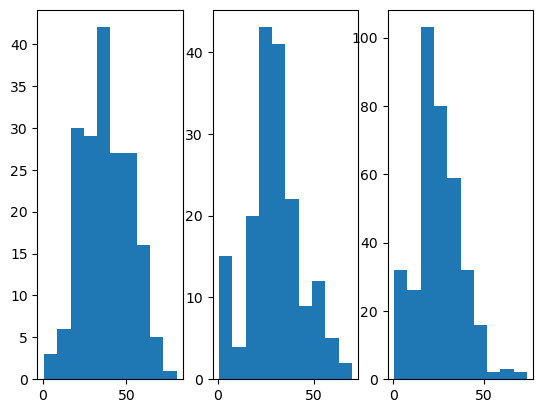

In [18]:
fig, axes = plt.subplots(1, 3)

for i in range(1, 4):
    x = train[train['Pclass']==i]['Age']
    axes[i-1].hist(x)

In [ ]:
fig, axes = plt.subplots(1, 3)
for i in range(1, 4):
    x = train[train['Pclass']==i]['Fare']
    plt.xlabel('Price')
    axes[i-1].hist(x)

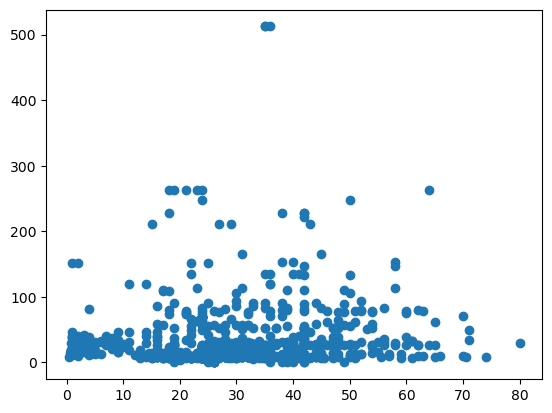

In [99]:
plt.scatter(train['Age'], train['Fare'])

In [21]:
train.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [22]:
train[train['Embarked'].isnull()].index

Int64Index([61, 829], dtype='int64')

In [23]:
train.loc[61, :]

Survived         1
Pclass           1
Sex              0
Age           38.0
SibSp            0
Parch            0
Ticket      113572
Fare          80.0
Embarked       NaN
Name: 61, dtype: object

In [24]:
train.loc[829, :]

Survived         1
Pclass           1
Sex              0
Age           62.0
SibSp            0
Parch            0
Ticket      113572
Fare          80.0
Embarked       NaN
Name: 829, dtype: object

In [25]:
pd.crosstab(train['Pclass'], train['Embarked'])

Embarked,C,Q,S
Pclass,,,
1,85,2,127
2,17,3,164
3,66,72,353


In [26]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

SibSp : 동승한 배우자 OR 형제자매
Parch : 부모/자식
Ticket : 티켓번호

In [27]:
train.groupby("Pclass")['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

#Embarked 칼럼 결측치 보완. 
결측값을 가진 데이터가 다른 칼럼들과 유의하게 다르지 않고, S와 크게 차이를 보이지 않는다면 최빈값인 S로 배정함.

In [28]:
train['Embarked'] = train['Embarked'].fillna('S')

In [29]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

In [30]:
train[['SibSp', 'Parch']].describe()

,SibSp,Parch
count,891.000000,891.000000
mean,0.523008,0.381594
std,1.102743,0.806057
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,8.000000,6.000000


# Ticket칼럼 제거(티켓번호 불필요)

In [31]:
train.drop(columns = ['Ticket'], inplace=True)

In [32]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,0,3,0,NaN,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


In [33]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Test에서도 동일하게 전처리 진행

In [34]:
test.drop(columns = ['Cabin', 'Name', 'Ticket'], inplace=True)

In [35]:
test['Sex'] = test['Sex'].replace('male', 1).replace('female', 0)

In [36]:
testpid = test['PassengerId']
test.drop(columns = 'PassengerId', inplace=True)

In [37]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,Q
1,3,0,47.0,1,0,7.0000,S
2,2,1,62.0,0,0,9.6875,Q
3,3,1,27.0,0,0,8.6625,S
4,3,0,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,1,NaN,0,0,8.0500,S
414,1,0,39.0,0,0,108.9000,C
415,3,1,38.5,0,0,7.2500,S
416,3,1,NaN,0,0,8.0500,S


In [38]:
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

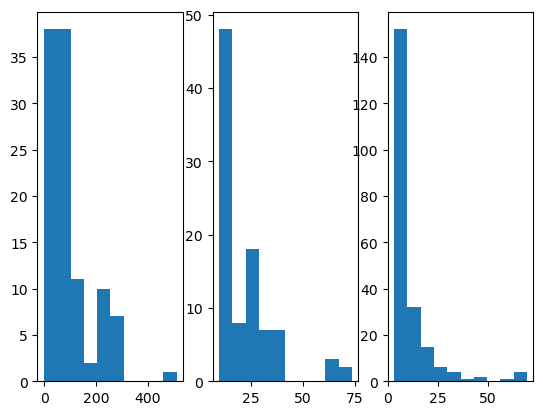

In [39]:
fig, axes = plt.subplots(1, 3)
for i in range(1, 4):
    x = test[test['Pclass']==i]['Fare']
    axes[i-1].hist(x)

In [40]:
test['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [41]:
test[test['Fare'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,3,1,60.5,0,0,NaN,S


In [42]:
test[test['Pclass']==3]['Fare'].mode()

0    7.75
Name: Fare, dtype: float64

In [43]:
test['Fare'] = test['Fare'].fillna(7.75)

In [44]:
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         0
Embarked     0
dtype: int64

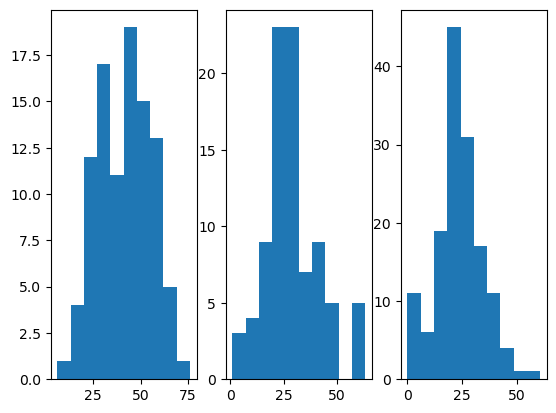

In [45]:
fig, axes = plt.subplots(1, 3)
for i in range(1, 4):
    x = test[test['Pclass']==i]['Age']
    axes[i-1].hist(x)

In [46]:
ages = test.groupby('Pclass')['Age'].median()

In [47]:
ages

Pclass
1    42.0
2    26.5
3    24.0
Name: Age, dtype: float64

In [48]:
for i in test[test['Age'].isnull()].index:
    if test.loc[i, 'Pclass'] == 1:
        test.loc[i, 'Age'] = 42
    elif test.loc[i, 'Pclass'] == 2:
        test.loc[i, 'Age']==26
    elif test.loc[i, 'Pclass'] == 3:
        test.loc[i, 'Age']=24

In [49]:
test.isnull().sum()

Pclass      0
Sex         0
Age         5
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [50]:
test[test['Age'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
54,2,1,NaN,0,0,15.5792,C
65,2,0,NaN,0,0,21.0000,S
84,2,1,NaN,0,0,10.7083,Q
301,2,1,NaN,0,0,15.0458,C
384,2,1,NaN,0,0,12.8750,S


In [51]:
len(test[test['Age'].isna()].index)

5

In [52]:
test['Age'] = test['Age'].fillna(26)

In [53]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [54]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [55]:
train[train['Age'].isnull()].head(50)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,1,NaN,0,0,8.4583,Q
17,1,2,1,NaN,0,0,13.0000,S
19,1,3,0,NaN,0,0,7.2250,C
26,0,3,1,NaN,0,0,7.2250,C
28,1,3,0,NaN,0,0,7.8792,Q
29,0,3,1,NaN,0,0,7.8958,S
31,1,1,0,NaN,1,0,146.5208,C
32,1,3,0,NaN,0,0,7.7500,Q
36,1,3,1,NaN,0,0,7.2292,C
42,0,3,1,NaN,0,0,7.8958,C


In [63]:
for i in train[train['Age'].isnull()].index:
    if train.loc[i, 'Pclass'] == 1:
        train.loc[i, 'Age'] = 42
    elif train.loc[i, 'Pclass'] == 2:
        train.loc[i, 'Age'] = 26
    else:
        train.loc[i, 'Age'] == 24

In [64]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         136
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [62]:
train[train['Age'].isnull()].head(50)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,1,NaN,0,0,8.4583,Q
19,1,3,0,NaN,0,0,7.2250,C
26,0,3,1,NaN,0,0,7.2250,C
28,1,3,0,NaN,0,0,7.8792,Q
29,0,3,1,NaN,0,0,7.8958,S
32,1,3,0,NaN,0,0,7.7500,Q
36,1,3,1,NaN,0,0,7.2292,C
42,0,3,1,NaN,0,0,7.8958,C
45,0,3,1,NaN,0,0,8.0500,S
46,0,3,1,NaN,1,0,15.5000,Q


In [65]:
train['Age'] = train['Age'].fillna(24)

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rfc = RandomForestClassifier()

In [68]:
from sklearn.model_selection import train_test_split

# One Hot Encoding(train['Embarked', 'Pclass'](선착장, 객실 등급)

In [73]:
train = pd.concat([train, pd.get_dummies(train['Embarked'], drop_first=True)], axis=1)

In [74]:
train = pd.concat([train, pd.get_dummies(train['Pclass'], drop_first=True)], axis=1)

In [75]:
train.drop(columns = ['Pclass', 'Embarked'], inplace=True)

In [76]:
train['Q'] = train['Q'].astype(int)

In [77]:
train['S'] = train['S'].astype(int)

In [78]:
train[2] = train[2].astype(int)

In [79]:
train[3] = train[3].astype(int)

In [80]:
train['2'] = train[2]
train.drop(columns = 2, inplace=True)

In [81]:
train['3'] = train[3]
train.drop(columns = 3, inplace=True)

In [82]:
target = train['Survived']
data = train.drop(columns = 'Survived')

# 모델 피팅(테이터 트레인셋 분리)

In [93]:
xtr, xte, ytr, yte = train_test_split(data, target)

# 모델 피팅(Random Forest Classifier 사용)

In [94]:
rfc.fit(xtr, ytr)

RandomForestClassifier()

In [95]:
pred = rfc.predict(xte)

In [96]:
from sklearn.metrics import roc_auc_score

In [97]:
roc_auc_score(yte, pred)

0.84881993006993

# Test 테이블도 동일한 처리 후 비교